# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [3]:
df = pd.read_csv('previsao_de_renda.csv')

In [4]:
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [5]:
df['data_ref'].unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

In [9]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [10]:
df['data_ref']

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
14995   2016-03-01
14996   2016-03-01
14997   2016-03-01
14998   2016-03-01
14999   2016-03-01
Name: data_ref, Length: 15000, dtype: datetime64[ns]

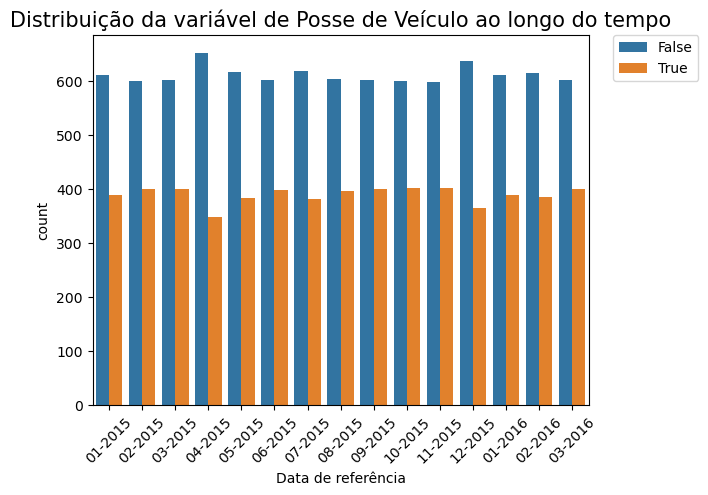

In [13]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=df)
plt.title('Distribuição da variável de Posse de Veículo ao longo do tempo', size=15)

dados_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(dados_labs, rotation=0)

plt.xticks(rotation=45)
plt.xlabel('Data de referência')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [15]:
df.groupby('data_ref')['tipo_renda'].value_counts()

data_ref    tipo_renda      
2015-01-01  Assalariado         536
            Empresário          218
            Pensionista         159
            Servidor público     87
2015-02-01  Assalariado         522
                               ... 
2016-02-01  Servidor público     89
2016-03-01  Assalariado         537
            Empresário          222
            Pensionista         165
            Servidor público     76
Name: count, Length: 63, dtype: int64

In [17]:
agrupado = df.groupby('data_ref')['tipo_renda'].value_counts()

In [26]:
#sns.barplot(data=agrupado, x='data_ref', y='tipo_renda')
result = agrupado.unstack(fill_value=0)
result.head(5)

tipo_renda,Assalariado,Bolsista,Empresário,Pensionista,Servidor público
data_ref,,,,,
2015-01-01,536,0,218,159,87
2015-02-01,522,2,204,174,98
2015-03-01,525,1,201,171,102
2015-04-01,517,0,210,180,93
2015-05-01,509,0,233,152,106


Text(0.5, 1.0, 'Contagem de Tipo de Renda por Data de Referência')

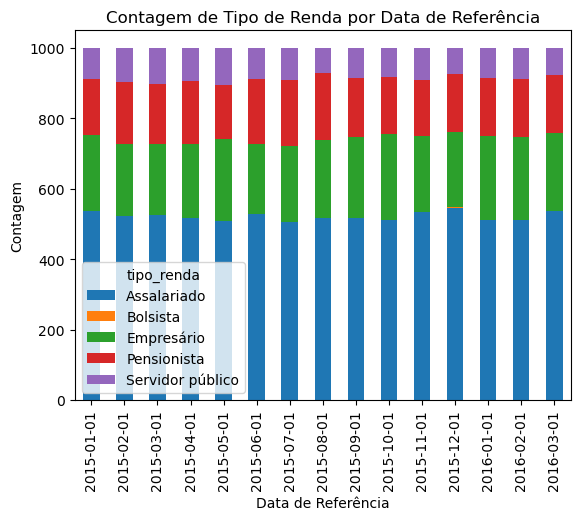

In [30]:
result.plot(kind='bar', stacked=True)
plt.xlabel('Data de Referência')
plt.ylabel('Contagem')
plt.title('Contagem de Tipo de Renda por Data de Referência')

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

<Axes: xlabel='data_ref'>

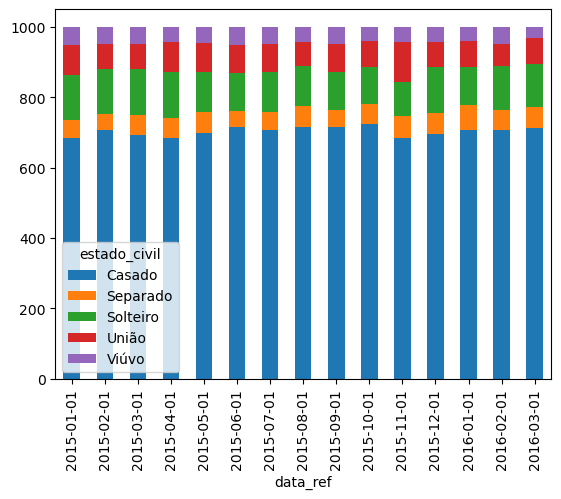

In [32]:
agrupado2 = df.groupby('data_ref')['estado_civil'].value_counts()
result1 = agrupado2.unstack(fill_value=0)
result1.plot(kind='bar', stacked=True)

<Axes: xlabel='data_ref'>

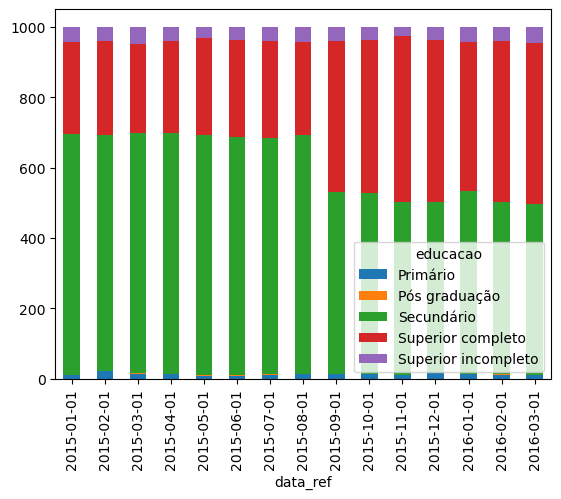

In [33]:
agrupado3 = df.groupby('data_ref')['educacao'].value_counts()
result2 = agrupado3.unstack(fill_value=0)
result2.plot(kind='bar', stacked=True)

<Axes: xlabel='data_ref'>

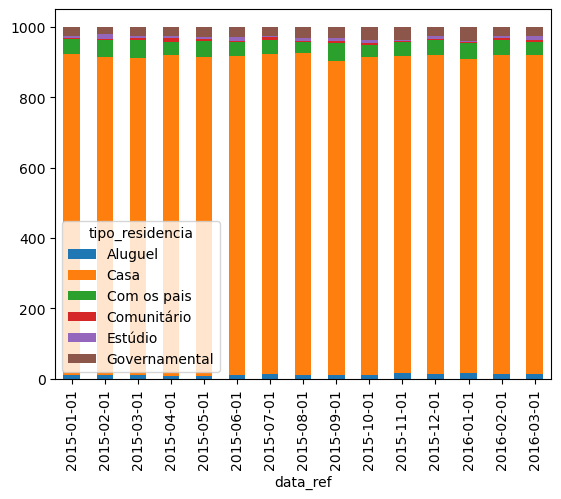

In [36]:
agrupado4 = df.groupby('data_ref')['tipo_residencia'].value_counts()
result3 = agrupado4.unstack(fill_value=0)
result3.plot(kind='bar', stacked=True)

<Axes: xlabel='data_ref'>

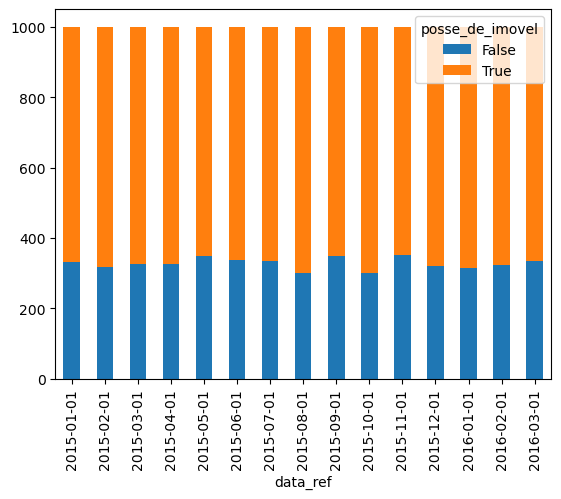

In [37]:
agrupado5 = df.groupby('data_ref')['posse_de_imovel'].value_counts()
result4 = agrupado5.unstack(fill_value=0)
result4.plot(kind='bar', stacked=True)

<Axes: xlabel='data_ref'>

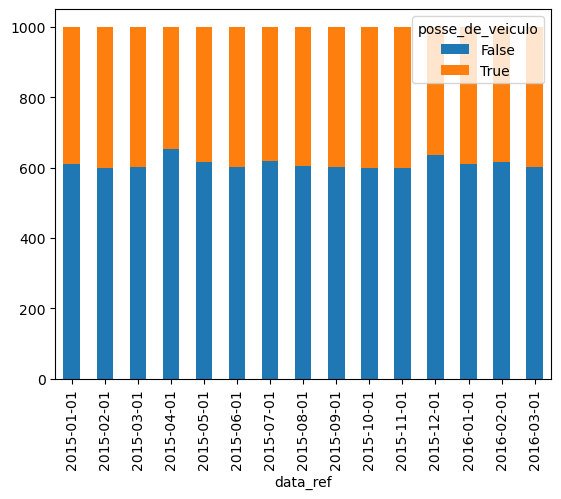

In [38]:
agrupado6 = df.groupby('data_ref')['posse_de_veiculo'].value_counts()
result5 = agrupado6.unstack(fill_value=0)
result5.plot(kind='bar', stacked=True)

Houve um aumento significativo no número de pessoas que possuíam ensino superior a partir do mês de setembro de 2015.